In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Defining Baseline model 
many methods to define the base line model:
1. average of the historical data.
2. Last avaibale value as the future forecast
3. average of the last 1 year data for future forecast
4. repeting the cyclical pattern

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/jj.csv")

# Mean data

In [15]:
train_data=data[:-4]
test_data=data[-4:]

mean_d=np.mean(train_data['data'])

test_data.loc[:,'pred_data']=mean_d

In [17]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [18]:
print(mape(test_data['data'],test_data['pred_data']))

70.00752579965119


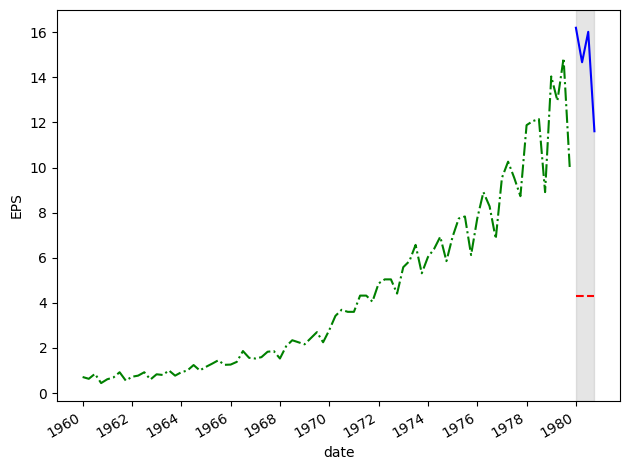

In [24]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.plot(train_data['date'],train_data['data'],'g-.',label='Train')
ax.plot(test_data['date'],test_data['pred_data'],'r--',label='Pred')
ax.plot(test_data['date'],test_data['data'],'b-',label='Test')
ax.set_xlabel('date')
ax.set_ylabel('EPS')
ax.axvspan(80,83,color='#808080',alpha=0.2)

plt.xticks(np.arange(0,85,8),np.arange(1960,1981,2))

fig.autofmt_xdate()
plt.tight_layout()

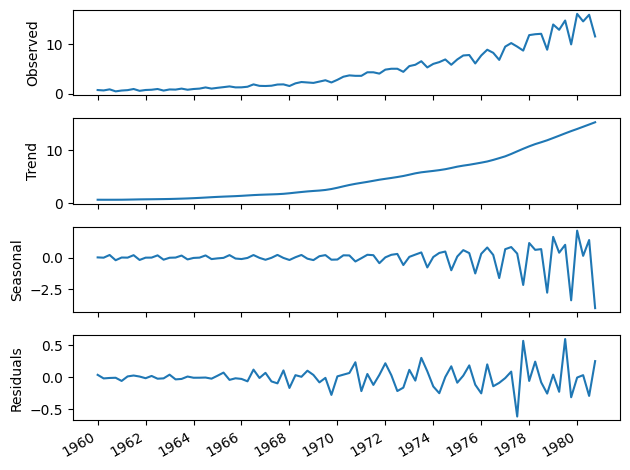

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL


advanced_decomposition = STL(data.data, period=4).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()


we can observe that in the above trend graph there is high increase in the laters qtrs and alose we have trand so wehn we caluclate the historical mean as the baseline it is giveing high error hence we have to go to the another method for caluclating the baseline model

# last year mean

In [32]:
last_year_mean=np.mean(train_data[-4:]['data'])

test_data.loc[:,'pred_data']=last_year_mean

/tmp/ipykernel_34/317335598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,'pred_data']=last_year_mean


In [34]:
print(mape(test_data['data'],test_data['pred_data']))

15.5963680725103


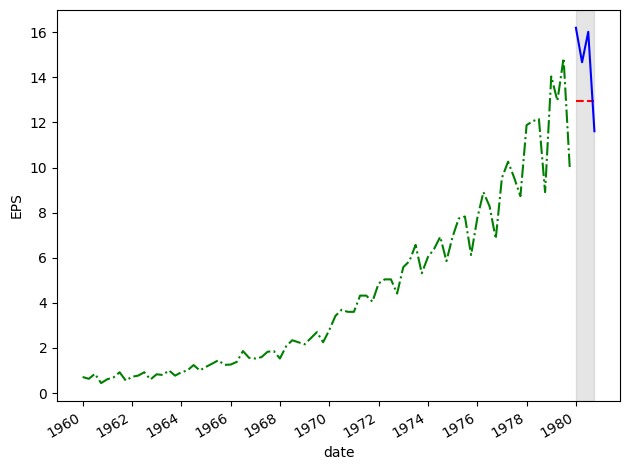

In [35]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.plot(train_data['date'],train_data['data'],'g-.',label='Train')
ax.plot(test_data['date'],test_data['pred_data'],'r--',label='Pred')
ax.plot(test_data['date'],test_data['data'],'b-',label='Test')
ax.set_xlabel('date')
ax.set_ylabel('EPS')
ax.axvspan(80,83,color='#808080',alpha=0.2)

plt.xticks(np.arange(0,85,8),np.arange(1960,1981,2))

fig.autofmt_xdate()
plt.tight_layout()

the error is reduced to 15% from 70% in this step by limiting the data for mean for only last 1 year, we are in the right direction but we have to reduct the MAPE nearly to 0 , here we can understand it clearly depends on the previous data (since the error is reduced by reducing the data to only last year), it is clear sign of autocorelation

# Last knowing value from the trainig data

In [45]:
last_known_mean=list(train_data[-1:]['data'])[0]

test_data.loc[:,'pred_data']=last_known_mean

/tmp/ipykernel_34/1400913954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,'pred_data']=last_known_mean


In [46]:
print(mape(test_data['data'],test_data['pred_data']))

30.457277908606535


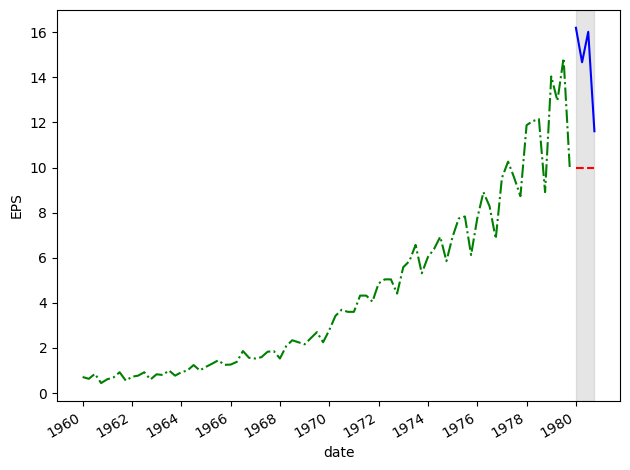

In [47]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.plot(train_data['date'],train_data['data'],'g-.',label='Train')
ax.plot(test_data['date'],test_data['pred_data'],'r--',label='Pred')
ax.plot(test_data['date'],test_data['data'],'b-',label='Test')
ax.set_xlabel('date')
ax.set_ylabel('EPS')
ax.axvspan(80,83,color='#808080',alpha=0.2)

plt.xticks(np.arange(0,85,8),np.arange(1960,1981,2))

fig.autofmt_xdate()
plt.tight_layout()

from the above graph the MAPE is not imporved by taking the last value the error got incresed this clearly indicates the that there is a cyclical behivior

# nive seasonla pattern

In [52]:


test_data.loc[:,'pred_data']=list(train_data[-4:]['data'])

/tmp/ipykernel_34/3967103303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,'pred_data']=list(train_data[-4:]['data'])


In [54]:
print(mape(test_data['data'],test_data['pred_data']))

11.561658552433654


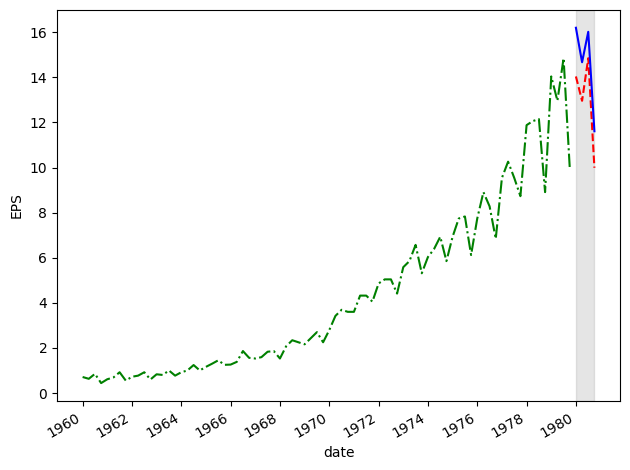

In [55]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.plot(train_data['date'],train_data['data'],'g-.',label='Train')
ax.plot(test_data['date'],test_data['pred_data'],'r--',label='Pred')
ax.plot(test_data['date'],test_data['data'],'b-',label='Test')
ax.set_xlabel('date')
ax.set_ylabel('EPS')
ax.axvspan(80,83,color='#808080',alpha=0.2)

plt.xticks(np.arange(0,85,8),np.arange(1960,1981,2))

fig.autofmt_xdate()
plt.tight_layout()